In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [36]:
# Importing Data File
df_matches = pd.read_csv('com.csv')
df_managers = pd.read_excel('PremierLeagueManagers.xlsx')
df_spending = pd.read_excel('Spending_data.xlsx')
# Ensure the match date is in datetime format
df_matches['Date'] = pd.to_datetime(df_matches['Date'],dayfirst = True)

# Sort the df_matches dataframe by ascending date order
df_matches = df_matches.sort_values(by='Date', ascending=True).reset_index(drop=True)

# Drop any rows where all the values are nan
#df_matches = df_matches.dropna()

# Ensure Season_Start and Season_End are in datetime format
df_managers['Season_Start'] = pd.to_datetime(df_managers['Season_Start'],dayfirst = True)
df_managers['Season_End'] = pd.to_datetime(df_managers['Season_End'],dayfirst = True)
# Ensure Season_Start and Season_End are in datetime format
df_spending['Season_Start'] = pd.to_datetime(df_spending['Season_Start'],dayfirst = True)
df_spending['Season_End'] = pd.to_datetime(df_spending['Season_End'],dayfirst = True)
#Showing What Each Training Dataset Looks Like
display(df_matches)
display(df_managers)
display(df_spending)

df_matches.dtypes

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,2024-11-10,Nott'm Forest,Newcastle,1.0,3.0,A,1.0,0.0,H,A Taylor,...,3.0,6.0,4.0,5.0,13.0,6.0,1.0,1.0,0.0,0.0
9327,2024-11-10,Tottenham,Ipswich,1.0,2.0,A,0.0,2.0,A,D England,...,5.0,3.0,12.0,2.0,10.0,19.0,1.0,5.0,0.0,0.0
9328,2024-11-10,Man United,Leicester,3.0,0.0,H,2.0,0.0,H,P Bankes,...,3.0,5.0,1.0,5.0,9.0,5.0,0.0,1.0,0.0,0.0
9329,2024-11-10,Chelsea,Arsenal,1.0,1.0,D,0.0,0.0,D,M Oliver,...,3.0,3.0,4.0,3.0,12.0,12.0,4.0,2.0,0.0,0.0


,Season_Start,Season_End,Manager,Club,Manager_Nationality
0,2024-08-16,2025-05-25,Mikel Arteta,Arsenal,Spain
1,2024-08-16,2025-05-25,Unai Emery,Aston Villa,Spain
2,2024-08-16,2025-05-25,Andoni Iraola,Bournemouth,Spain
3,2024-08-16,2025-05-25,Thomas Frank,Brentford,Denmark
4,2024-08-16,2025-05-25,Fabian Hürzeler,Brighton,Germany
...,...,...,...,...,...
696,2000-08-19,2001-05-19,David Pleat,Tottenham,England
697,2000-08-19,2001-05-19,George Graham,Tottenham,Scotland
698,2000-08-19,2001-05-19,Glenn Hoddle,Tottenham,England
699,2000-08-19,2001-05-19,Glenn Roeder,West Ham,England


,Team,Expenditure,Season_Start,Season_End
0,Brighton,244.20,2024-08-16,2025-05-25
1,Chelsea,238.50,2024-08-16,2025-05-25
2,Man United,214.50,2024-08-16,2025-05-25
3,Aston Villa,176.20,2024-08-16,2025-05-25
4,Tottenham,148.85,2024-08-16,2025-05-25
...,...,...,...,...
495,Man United,11.70,2000-08-19,2001-05-19
496,Leicester,11.70,2000-08-19,2001-05-19
497,Ipswich,9.90,2000-08-19,2001-05-19
498,Bradford,6.61,2000-08-19,2001-05-19


Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG               float64
FTAG               float64
FTR                 object
HTHG               float64
HTAG               float64
HTR                 object
Referee             object
HS                 float64
AS                 float64
HST                float64
AST                float64
HC                 float64
AC                 float64
HF                 float64
AF                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
dtype: object

In [37]:
# Function to get the manager for a specific team and match date
def get_spending(team, match_date):
    spending_row = df_spending[
        (df_spending['Team'] == team) &
        (df_spending['Season_Start'] <= match_date) &
        (df_spending['Season_End'] >= match_date)
    ]
    return spending_row['Expenditure'].iloc[0] if not spending_row.empty else None

# Add HomeManager and AwayManager columns to df_matches
df_matches['HomeSpending'] = df_matches.apply(lambda row: get_spending(row['HomeTeam'], row['Date']), axis=1)
df_matches['AwaySpending'] = df_matches.apply(lambda row: get_spending(row['AwayTeam'], row['Date']), axis=1)

In [45]:
# Calculating Rolling Average Statistics
k = 38 # Number of matches to look backwards to.

# Function to Calculate Rolling Average Statistics for the Past k Matches. Each row's kAvg does not include the current results.
def generate_kAvg(df, attribute, HomeTeam=True):
    if HomeTeam:
        group_by_team = "HomeTeam"
    elif not HomeTeam:
        group_by_team = "AwayTeam"
    
    kattribute = "k" + attribute
    df[kattribute] = (
    df.groupby(group_by_team)[attribute]     # Group by HomeTeam or AwayTeam
    .transform(lambda x: x.shift(1).rolling(window=k, min_periods=1).mean())  # Shift by 1 to exclude the current match, and create a rolling window of up to k past matches
    )
    df[kattribute] = df[kattribute].fillna(0) # Filling nan values with 0

Home_kAvg_features = ['FTHG','HTHG','HS','HC','HF','HY','HR']
Away_kAvg_features = ['FTAG','HTAG','AS','AC','AF','AY','AR']

for feature in Home_kAvg_features:
    generate_kAvg(df_matches, feature,True)
for feature in Away_kAvg_features:
    generate_kAvg(df_matches, feature,False)
    
display(df_matches)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,nHF_Pairwise,nHY_Pairwise,nHR_Pairwise,nFTAG_Pairwise,nHTAG_Pairwise,nAS_Pairwise,nAC_Pairwise,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,12.000000,1.000000,0.0,0.00,0.000000,8.000000,4.000000,20.0,4.000000,1.000000
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,15.000000,2.500000,0.0,1.00,1.000000,8.000000,3.500000,17.0,2.000000,0.500000
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,13.666667,2.333333,0.0,1.00,0.666667,9.333333,5.333333,18.0,2.333333,0.333333
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,14.250000,2.500000,0.0,0.75,0.500000,8.500000,5.500000,17.5,2.750000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,2024-11-09,Brighton,Man City,2.0,1.0,H,0.0,1.0,A,S Barrott,...,8.200000,1.400000,0.0,0.80,0.600000,7.200000,2.600000,9.0,1.800000,0.000000
9326,2024-11-10,Nott'm Forest,Newcastle,1.0,3.0,A,1.0,0.0,H,A Taylor,...,8.200000,1.400000,0.0,0.60,0.600000,8.600000,2.600000,8.8,2.000000,0.000000
9327,2024-11-10,Tottenham,Ipswich,1.0,2.0,A,0.0,2.0,A,D England,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9328,2024-11-10,Man United,Leicester,3.0,0.0,H,2.0,0.0,H,P Bankes,...,14.000000,4.000000,1.0,2.00,0.000000,20.000000,3.000000,16.0,3.000000,1.000000


In [46]:
# Function to get the manager for a specific team and match date
def get_manager(team, match_date):
    manager_row = df_managers[
        (df_managers['Club'] == team) &
        (df_managers['Season_Start'] <= match_date) &
        (df_managers['Season_End'] >= match_date)
    ]
    return manager_row['Manager'].iloc[0] if not manager_row.empty else None

# Add HomeManager and AwayManager columns to df_matches
df_matches['HomeManager'] = df_matches.apply(lambda row: get_manager(row['HomeTeam'], row['Date']), axis=1)
df_matches['AwayManager'] = df_matches.apply(lambda row: get_manager(row['AwayTeam'], row['Date']), axis=1)

In [47]:
# Create a new column to store home wins and away wins
df_matches['HomeWin'] = (df_matches['FTR'] == 'H').astype(int)
df_matches['AwayWin'] = (df_matches['FTR'] == 'A').astype(int)

# Calculate rolling win rate for home games
df_matches['HomeWinRate'] = (
    df_matches.groupby('HomeTeam')['HomeWin']    # Group by HomeTeam
    .cumsum()                                    # Cumulative sum of home wins
    / df_matches.groupby('HomeTeam').cumcount()  # Divide by cumulative games played
    .add(1)                                      # To avoid division by zero
)

# Calculate rolling win rate for away games
df_matches['AwayWinRate'] = (
    df_matches.groupby('AwayTeam')['AwayWin']    # Group by AwayTeam
    .cumsum()                                    # Cumulative sum of away wins
    / df_matches.groupby('AwayTeam').cumcount()  # Divide by cumulative games played
    .add(1)                                      # To avoid division by zero
)
df_matches.drop(df_matches.tail(1).index,inplace=True) # drop last n rows

# Display relevant columns
display(df_matches)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,nHF_Pairwise,nHY_Pairwise,nHR_Pairwise,nFTAG_Pairwise,nHTAG_Pairwise,nAS_Pairwise,nAC_Pairwise,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,12.000000,1.000000,0.0,0.00,0.000000,8.000000,4.000000,20.0,4.000000,1.000000
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,15.000000,2.500000,0.0,1.00,1.000000,8.000000,3.500000,17.0,2.000000,0.500000
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,13.666667,2.333333,0.0,1.00,0.666667,9.333333,5.333333,18.0,2.333333,0.333333
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,14.250000,2.500000,0.0,0.75,0.500000,8.500000,5.500000,17.5,2.750000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,2024-11-09,Wolves,Southampton,2.0,0.0,H,1.0,0.0,H,T Bramall,...,8.800000,1.200000,0.0,1.20,0.800000,8.800000,3.200000,8.2,1.600000,0.000000
9325,2024-11-09,Brighton,Man City,2.0,1.0,H,0.0,1.0,A,S Barrott,...,8.200000,1.400000,0.0,0.80,0.600000,7.200000,2.600000,9.0,1.800000,0.000000
9326,2024-11-10,Nott'm Forest,Newcastle,1.0,3.0,A,1.0,0.0,H,A Taylor,...,8.200000,1.400000,0.0,0.60,0.600000,8.600000,2.600000,8.8,2.000000,0.000000
9327,2024-11-10,Tottenham,Ipswich,1.0,2.0,A,0.0,2.0,A,D England,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Number of matches to look back
n = 5

# Precompute rolling averages for all attributes
def compute_pairwise_rolling(data, attributes, n):
    for attribute in attributes:
        # Group by HomeTeam and AwayTeam
        grouped = data.groupby(['HomeTeam', 'AwayTeam'])[attribute]
        # Calculate rolling averages and align the index
        rolling_avg = grouped.apply(lambda x: x.shift(1).rolling(window=n, min_periods=1).mean())
        # Align the new column with the original DataFrame's index
        data[f"n{attribute}_Pairwise"] = rolling_avg.values
    return data

# List of attributes to calculate rolling averages for
attributes = ['FTHG', 'HTHG', 'HS', 'HC', 'HF', 'HY', 'HR',
              'FTAG', 'HTAG', 'AS', 'AC', 'AF', 'AY', 'AR']

# Apply the optimized function
df_matches = compute_pairwise_rolling(df_matches, attributes, n)

display(df_matches)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,nHF_Pairwise,nHY_Pairwise,nHR_Pairwise,nFTAG_Pairwise,nHTAG_Pairwise,nAS_Pairwise,nAC_Pairwise,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,12.000000,1.000000,0.0,0.00,0.000000,8.000000,4.000000,20.0,4.000000,1.000000
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,15.000000,2.500000,0.0,1.00,1.000000,8.000000,3.500000,17.0,2.000000,0.500000
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,13.666667,2.333333,0.0,1.00,0.666667,9.333333,5.333333,18.0,2.333333,0.333333
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,14.250000,2.500000,0.0,0.75,0.500000,8.500000,5.500000,17.5,2.750000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,2024-11-09,Brighton,Man City,2.0,1.0,H,0.0,1.0,A,S Barrott,...,8.200000,1.400000,0.0,0.80,0.600000,7.200000,2.600000,9.0,1.800000,0.000000
9326,2024-11-10,Nott'm Forest,Newcastle,1.0,3.0,A,1.0,0.0,H,A Taylor,...,8.200000,1.400000,0.0,0.60,0.600000,8.600000,2.600000,8.8,2.000000,0.000000
9327,2024-11-10,Tottenham,Ipswich,1.0,2.0,A,0.0,2.0,A,D England,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9328,2024-11-10,Man United,Leicester,3.0,0.0,H,2.0,0.0,H,P Bankes,...,14.000000,4.000000,1.0,2.00,0.000000,20.000000,3.000000,16.0,3.000000,1.000000


In [48]:
# Team Names
le_teams = LabelEncoder()

# Using the same label encoder for the home and away teams.
le_teams.fit(pd.concat([df_matches['HomeTeam'],df_matches['AwayTeam']])) 

# Using the label encoder to encode the home and away teams
df_matches['HomeTeam_Encoded'] = le_teams.transform(df_matches['HomeTeam'])
df_matches['AwayTeam_Encoded'] = le_teams.transform(df_matches['AwayTeam'])

# FTR and HTR
le_results = LabelEncoder()
le_results.fit(pd.concat([df_matches['FTR'],df_matches['HTR']]))

# Using the label encoder to encode the FTR and HTR
df_matches['FTR_Encoded'] = le_results.transform(df_matches['FTR'])
df_matches['HTR_Encoded'] = le_results.transform(df_matches['HTR'])

# Referee
le_referee = LabelEncoder()
le_referee.fit(df_matches['Referee'])

df_matches['Referee_Encoded'] = le_referee.transform(df_matches['Referee'])

# Managers
le_managers = LabelEncoder() 
le_managers.fit(pd.concat([df_matches['HomeManager'],df_matches['AwayManager']]))
df_matches['HomeManager_Encoded'] = le_managers.transform(df_matches['HomeManager'])
df_matches['AwayManager_Encoded'] = le_managers.transform(df_matches['AwayManager'])

display(df_matches)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise,HomeTeam_Encoded,AwayTeam_Encoded,FTR_Encoded,HTR_Encoded,Referee_Encoded,HomeManager_Encoded,AwayManager_Encoded
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,NaN,NaN,NaN,12,26,2,2,143,2,78
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,20.0,4.000000,1.000000,13,43,2,2,65,30,61
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,17.0,2.000000,0.500000,14,28,0,1,19,62,164
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,18.0,2.333333,0.333333,16,36,1,0,12,77,160
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,17.5,2.750000,0.250000,22,17,2,2,46,36,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,2024-11-09,Wolves,Southampton,2.0,0.0,H,1.0,0.0,H,T Bramall,...,8.2,1.600000,0.000000,45,36,2,2,165,57,143
9325,2024-11-09,Brighton,Man City,2.0,1.0,H,0.0,1.0,A,S Barrott,...,9.0,1.800000,0.000000,9,26,2,0,148,49,124
9326,2024-11-10,Nott'm Forest,Newcastle,1.0,3.0,A,1.0,0.0,H,A Taylor,...,8.8,2.000000,0.000000,31,29,0,2,4,112,44
9327,2024-11-10,Tottenham,Ipswich,1.0,2.0,A,0.0,2.0,A,D England,...,NaN,NaN,NaN,40,21,0,0,34,10,90


In [49]:
input_features = ['HomeTeam_Encoded','AwayTeam_Encoded','HomeManager_Encoded',
                 'AwayManager_Encoded','Referee_Encoded','kFTHG', 'kHTHG','kHS', 'kHC', 'kHF', 'kHY', 
                  'kHR', 'kFTAG', 'kHTAG', 'kAS', 'kAC', 'kAF', 'kAY', 'kAR', 
                  'HomeWinRate', 'AwayWinRate', 
                  'nFTHG_Pairwise', 'nHTHG_Pairwise', 'nHS_Pairwise', 'nHC_Pairwise',
                   'nHF_Pairwise', 'nHY_Pairwise', 'nHR_Pairwise', 'nFTAG_Pairwise',
                   'nHTAG_Pairwise', 'nAS_Pairwise', 'nAC_Pairwise', 'nAF_Pairwise',
                   'nAY_Pairwise', 'nAR_Pairwise','HomeSpending','AwaySpending']
df_input = df_matches[input_features]
df_input = df_matches[input_features].fillna(0)
display(df_input)
output_features = ['FTR_Encoded']
df_output = df_matches['FTR_Encoded']
display(df_output)

,HomeTeam_Encoded,AwayTeam_Encoded,HomeManager_Encoded,AwayManager_Encoded,Referee_Encoded,kFTHG,kHTHG,kHS,kHC,kHF,...,nHR_Pairwise,nFTAG_Pairwise,nHTAG_Pairwise,nAS_Pairwise,nAC_Pairwise,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise,HomeSpending,AwaySpending
0,12,26,2,78,143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,20.80,20.28
1,13,43,30,61,65,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.000000,8.000000,4.000000,20.0,4.000000,1.000000,52.39,18.65
2,14,28,62,164,19,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.00,1.000000,8.000000,3.500000,17.0,2.000000,0.500000,0.00,0.00
3,16,36,77,160,12,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.00,0.666667,9.333333,5.333333,18.0,2.333333,0.333333,13.33,0.00
4,22,17,36,174,46,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.75,0.500000,8.500000,5.500000,17.5,2.750000,0.250000,53.15,34.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,45,36,57,143,165,1.394737,0.605263,11.157895,8.342105,9.421053,...,0.0,1.20,0.800000,8.800000,3.200000,8.2,1.600000,0.000000,74.40,117.15
9325,9,26,49,124,148,1.921053,0.868421,17.657895,9.368421,9.473684,...,0.0,0.80,0.600000,7.200000,2.600000,9.0,1.800000,0.000000,0.00,25.00
9326,31,29,112,44,4,1.447368,0.631579,12.605263,7.263158,7.868421,...,0.0,0.60,0.600000,8.600000,2.600000,8.8,2.000000,0.000000,105.50,68.20
9327,40,21,10,90,34,2.026316,0.684211,17.000000,8.947368,9.736842,...,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,148.85,126.49


0       2
1       2
2       0
3       1
4       2
       ..
9324    2
9325    2
9326    0
9327    0
9328    2
Name: FTR_Encoded, Length: 9329, dtype: int32

In [50]:
# Features and target
X = df_input
y = df_output

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM
svm_model = SVC(kernel='rbf', C = 1 ,gamma='scale')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Accuracy: 0.5524520948359857
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52       904
           1       0.30      0.03      0.05       738
           2       0.56      0.86      0.68      1437

    accuracy                           0.55      3079
   macro avg       0.47      0.46      0.42      3079
weighted avg       0.50      0.55      0.48      3079



In [51]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming you already have your data: X, y (input and target)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# For L2 Regularization (Default in SVC)
svm_model_l2 = SVC(kernel='rbf', C=1.00, gamma = 'scale' )  # L2 regularization by default
svm_model_l2.fit(X_train, y_train)

# Predictions for L2
y_pred_l2 = svm_model_l2.predict(X_test)

# Evaluate L2 model
print("L2 Regularization - Accuracy:", accuracy_score(y_test, y_pred_l2))
print("L2 Regularization - Classification Report:\n", classification_report(y_test, y_pred_l2))

# For L1 Regularization using LinearSVC
svm_model_l1 = LinearSVC(penalty='l1', dual=False, C=1.0)  # L1 regularization
svm_model_l1.fit(X_train, y_train)

# Predictions for L1
y_pred_l1 = svm_model_l1.predict(X_test)

# Evaluate L1 model
print("L1 Regularization - Accuracy:", accuracy_score(y_test, y_pred_l1))
print("L1 Regularization - Classification Report:\n", classification_report(y_test, y_pred_l1))



L2 Regularization - Accuracy: 0.5524520948359857
L2 Regularization - Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52       904
           1       0.30      0.03      0.05       738
           2       0.56      0.86      0.68      1437

    accuracy                           0.55      3079
   macro avg       0.47      0.46      0.42      3079
weighted avg       0.50      0.55      0.48      3079

L1 Regularization - Accuracy: 0.5621955180253329
L1 Regularization - Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.54       904
           1       0.38      0.03      0.05       738
           2       0.57      0.85      0.68      1437

    accuracy                           0.56      3079
   macro avg       0.50      0.47      0.43      3079
weighted avg       0.52      0.56      0.49      3079



In [52]:
correlation_matrix = pd.concat([df_input, df_output], axis=1).corr()
sorted_correlation = correlation_matrix['FTR_Encoded'].abs().sort_values(ascending = False)

display(sorted_correlation)

FTR_Encoded            1.000000
HomeWinRate            0.309994
AwayWinRate            0.297894
kFTHG                  0.246906
kFTAG                  0.243467
kAS                    0.241125
kHTHG                  0.223060
kHS                    0.214511
kHTAG                  0.212990
kAC                    0.178080
kHC                    0.171659
kHY                    0.111633
AwaySpending           0.094777
HomeSpending           0.084147
HomeManager_Encoded    0.073020
AwayTeam_Encoded       0.063940
kAF                    0.057497
AwayManager_Encoded    0.055162
kHF                    0.054414
HomeTeam_Encoded       0.053989
kHR                    0.025495
Referee_Encoded        0.024506
nAY_Pairwise           0.020339
nHC_Pairwise           0.018492
nAF_Pairwise           0.016999
nHS_Pairwise           0.013783
nFTHG_Pairwise         0.011938
kAY                    0.011164
nHF_Pairwise           0.006398
nFTAG_Pairwise         0.006253
nHTAG_Pairwise         0.005028
nAR_Pair

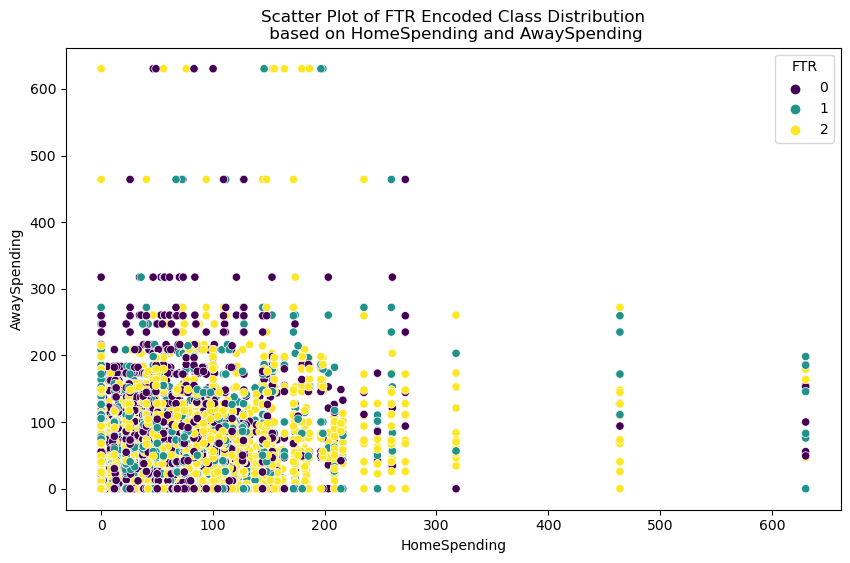

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ftr_class_distribution(X, y, feature_x, feature_y):
    """
    This function takes in the input features (X), the target variable (y),
    and two features (feature_x, feature_y) to plot a scatter plot
    visualizing the class distribution of 'FTR_Encoded' based on the two features.
    """
    # Create a new DataFrame combining the input features and the target feature (FTR_Encoded)
    df = X.copy()
    df['FTR'] = y  # Adding the target variable to the dataframe for plotting
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='FTR', palette='viridis', alpha=1)

    # Adding labels and title
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f'Scatter Plot of FTR Encoded Class Distribution\n based on {feature_x} and {feature_y}')

    # Show the plot
    plt.show()

# Example usage: plot FTR distribution based on 'HomeTeam_Encoded' and 'AwayTeam_Encoded'
plot_ftr_class_distribution(X, y, 'HomeSpending', 'AwaySpending')




## PCA PLOT


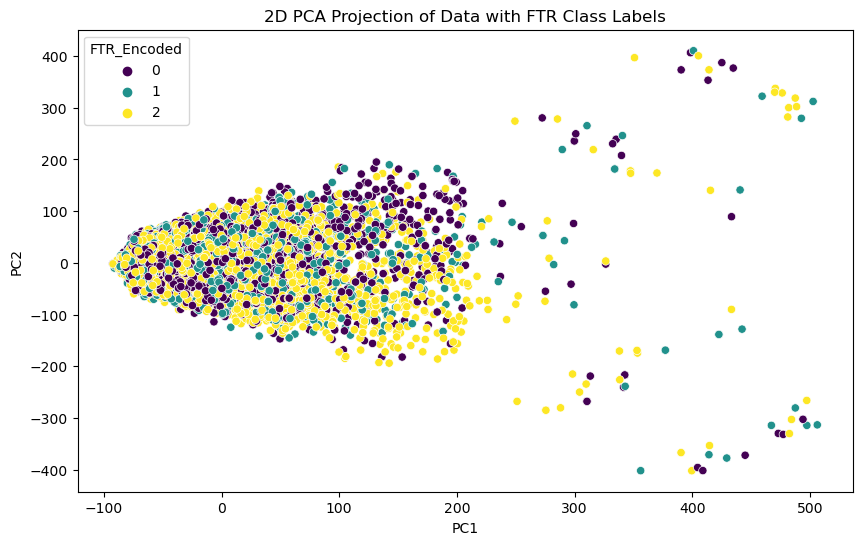

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X)

# Create a DataFrame with the first two PCA components and FTR_Encoded
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['FTR_Encoded'] = y

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='FTR_Encoded', palette='viridis', alpha=1)
plt.title('2D PCA Projection of Data with FTR Class Labels')
plt.show()

